In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
sys.path.insert(0,'../src/')
from develop_LSTM_model import prepare_lstm_data,build_lstm_model,train_lstm_model,forecast_lstm,evaluate_lstm_model,plot_lstm_forecast,plot_loss

In [2]:
# Prepare data as train and test
tesla_data = pd.read_csv("../data/TSLA_data.csv")
X_train, X_test, y_train, y_test = prepare_lstm_data(tesla_data['Close'])

In [3]:
# Build LSTM model
lstm_model = build_lstm_model((X_train.shape[1], 1))
history = train_lstm_model(lstm_model, X_train, y_train)


c:\Users\Tsegaye\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.1024 - val_loss: 0.0047
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0135 - val_loss: 0.0038
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0093 - val_loss: 0.0036
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0065 - val_loss: 0.0035
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0055 - val_loss: 0.0031
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0058 - val_loss: 0.0030
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0053 - val_loss: 0.0024
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

In [4]:
predictions = forecast_lstm(lstm_model, X_test)
mae, rmse, mape = evaluate_lstm_model(y_test, predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


In [5]:
print("mae: ",mae)
print("rmse: ",rmse)
print("mape: ",mape)

mae:  0.02210118467691453
rmse:  0.0279822396869959
mape:  20.55174607323274


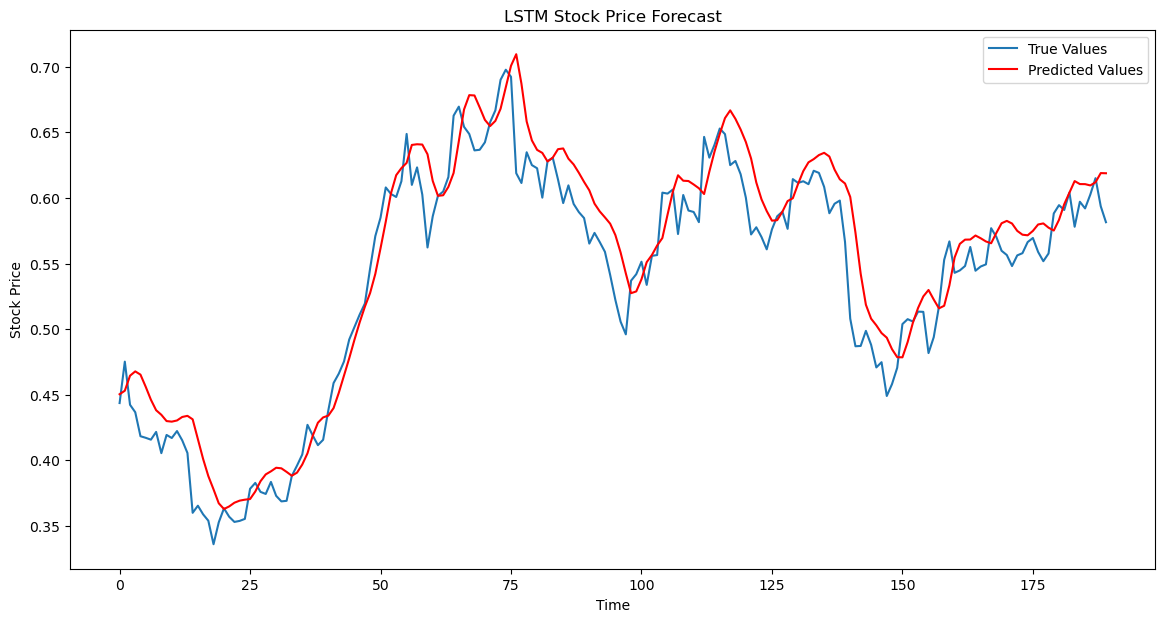

In [6]:
plot_lstm_forecast(y_test, predictions)


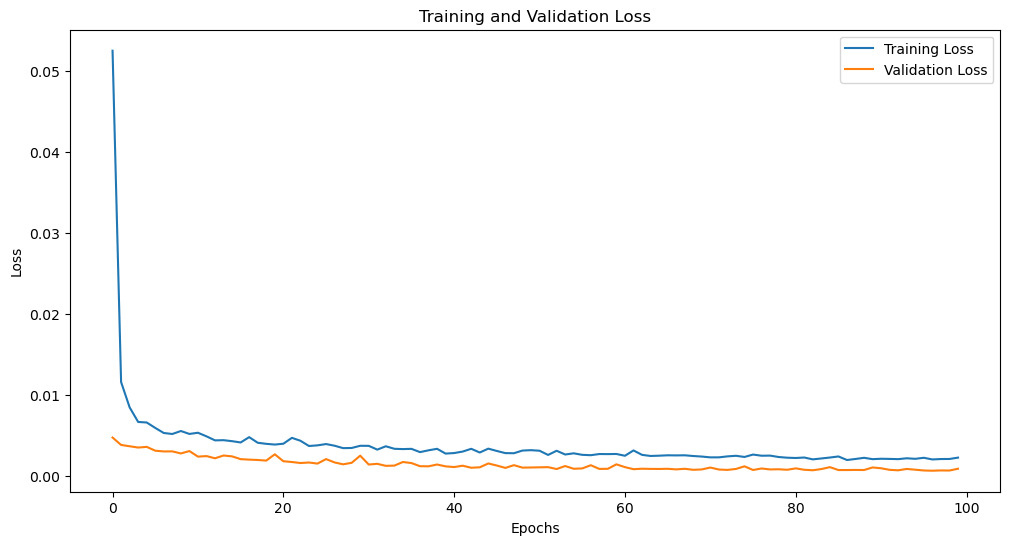

In [7]:
# Check for overfitting by plotting training and validation loss
plot_loss(history)

In [8]:
# save the model for later usage
model_save_path = '../model/lstm_model.h5'
lstm_model.save(model_save_path)